In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn import metrics
from tqdm.notebook import tqdm
from tqdm.gui import tqdm
from tqdm import tqdm_notebook
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.shape

(5172, 3002)

In [5]:
df.describe().T         

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


In [6]:
df = df.drop("Email No.", axis=1)

In [7]:
df.isna().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

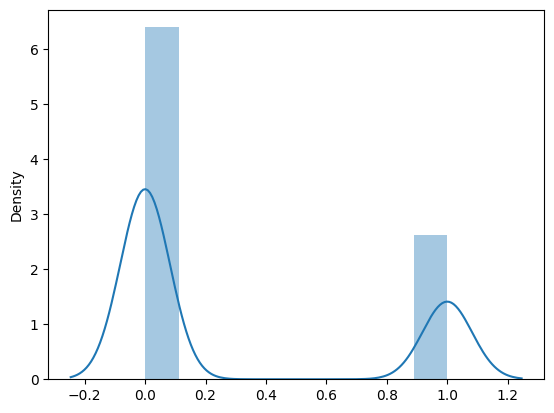

In [8]:
sns.distplot(x=df["Prediction"])
plt.show()

In [9]:
x = df.drop("Prediction", axis=1)
y = df[["Prediction"]]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
accuracy_values = []

In [12]:
for k in k_values:
    print(f"Testing k={k}...")  # Progress indicator
    model = KNeighborsClassifier(n_neighbors=k)
    try:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    except Exception as e:
        print(f"Error with k={k}: {e}")

Testing k=1...
Testing k=3...
Testing k=5...
Testing k=7...
Testing k=9...
Testing k=11...
Testing k=13...
Testing k=15...
Testing k=17...
Testing k=19...
Testing k=21...
Testing k=23...
Testing k=25...
Testing k=27...
Testing k=29...


In [13]:
# Check if accuracy_values contains values
print("Accuracy values:", accuracy_values)

Accuracy values: [0.863768115942029, 0.8676328502415459, 0.863768115942029, 0.8676328502415459, 0.8685990338164251, 0.8685990338164251, 0.8714975845410629, 0.8763285024154589, 0.8714975845410629, 0.8792270531400966, 0.8724637681159421, 0.8753623188405797, 0.8724637681159421, 0.8705314009661835, 0.8734299516908213]


In [14]:
# Plot using Plotly
fig = px.line(
    x=k_values,
    y=accuracy_values,
    labels={"x": "k value", "y": "Accuracy"},
    title="KNN Accuracy for Different k Values",
)
fig.show()

In [15]:
# If accuracy_values has values, find optimal_k
if accuracy_values:
    max_accuracy_index = accuracy_values.index(max(accuracy_values))
    optimal_k = k_values[max_accuracy_index]
    print(f"Optimal k: {optimal_k}")
else:
    print("No accuracy values calculated.")

Optimal k: 19


In [16]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

In [17]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [18]:
y_pred = knn_model.predict(x_test)

In [19]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       757
           1       0.75      0.83      0.79       278

    accuracy                           0.88      1035
   macro avg       0.84      0.86      0.85      1035
weighted avg       0.88      0.88      0.88      1035



In [20]:
svm_model = SVC()

In [21]:
svm_model.fit(x_train, y_train)

SVC()

In [22]:
y_pred = svm_model.predict(x_test)

In [23]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       757
           1       0.87      0.39      0.54       278

    accuracy                           0.82      1035
   macro avg       0.84      0.68      0.71      1035
weighted avg       0.83      0.82      0.79      1035

